## Model_NowTV
## Table of Contents:
* [0. Importing dependencies](#dependencies)
* [1. Setting up of the dataset](#1.0)
    * [1.1 Importing of the dataset](#1.1)
    * [1.2 Splitting of the dataset](#1.2)
* [2. Model Implementation](#2.0)
    * [2.1 Model testing and evaluation](#2.1)


# 0. Importing dependencies  <a class="anchor" id="dependencies"></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install xgboost
import xgboost as xgb
!pip install lightgbm
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import joblib
from sklearn.model_selection import RandomizedSearchCV

# 1. Setting up of the dataset <a class="anchor" id="1.0"></a>

## 1.1 Importing of the dataset <a class="anchor" id="1.1"></a>

In [ ]:
# Load the final dataframe
file_path = 'C:/Users/support/Desktop/Yılın Yang/df_final.csv'
df_final = pd.read_csv(file_path)

print(df_final.columns)

Index(['trend_vc', 'yearly_vc', 'weekly_vc', 'trend_i', 'yearly_i', 'weekly_i',
       'trend_ud', 'yearly_ud', 'weekly_ud', 'videoConsumption', 'impression'],
      dtype='object')


## 1.2 Splitting the dataset <a class="anchor" id="1.2"></a>

In [ ]:
# Define input features and target outputs
prophet_features = ['weekly_vc', 'weekly_i', 'weekly_ud']
targets = ['videoConsumption', 'impression']

all_features = prophet_features + targets  # Include both Prophet features and original data


In [ ]:
# Split dataset function
def split_dataset(df):
    idx_train_end = round(0.7 * len(df))
    idx_val_end = round(0.85 * len(df))
    return df.iloc[:idx_train_end], df.iloc[idx_train_end:idx_val_end], df.iloc[idx_val_end:]

df_train, df_val, df_test = split_dataset(df_final)
test_data = df_test[all_features].values

# 2. Model Implementation <a class="anchor" id="2.0"></a>

## 2.1 Model  Model testing and evaluation <a class="anchor" id="2.1"></a>

In [ ]:
# Load the best models
rf_model = joblib.load('C:/Users/support/Desktop/Yılın Yang/rf_rw_add_best_model.pkl')
lgbm_model = joblib.load('C:/Users/support/Desktop/Yılın Yang/LGBM_rw_add_best_model.pkl')
xgb_model = joblib.load('C:/Users/support/Desktop/Yılın Yang/XGBoost_rw_add_best_model.pkl')

C:\Users\support\anaconda3\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\support\anaconda3\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\support\anaconda3\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator MultiOutputRegressor from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid re

In [ ]:
# Define hyperparameter grid for tuning
rf_param_dist = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [10, 20, 30],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__max_features': [1.0]
}

lgbm_param_dist = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__num_leaves': [31, 62, 124],
    'estimator__learning_rate': [0.01, 0.05, 0.1]
}

xgb_param_dist = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [10, 20, 30],
    'estimator__learning_rate': [0.01, 0.05, 0.1]
}


In [ ]:
# Function for random search with cross-validation
def random_search(model, param_dist, X_val, y_val, n_iter=27):
    random_search = RandomizedSearchCV(model, param_dist, n_iter=n_iter, cv=3, scoring='neg_mean_squared_error', random_state=42)
    random_search.fit(X_val, y_val)
    print(f"Best parameters: {random_search.best_params_}")
    print(f"Best score: {-random_search.best_score_}")
    return random_search.best_estimator_

In [ ]:
# Prepare validation and test data
X_val = df_val[all_features].dropna().values  # All five features
y_val = df_val[targets].dropna().values  # Target variables only
X_test = df_test[all_features].dropna().values  # All five features
y_test = df_test[targets].dropna().values  # Target variables only

In [ ]:
# Perform random search for hyperparameter tuning
best_rf_model = random_search(rf_model, rf_param_dist, X_val, y_val)
best_lgbm_model = random_search(lgbm_model, lgbm_param_dist, X_val, y_val)
best_xgb_model = random_search(xgb_model, xgb_param_dist, X_val, y_val)

C:\Users\support\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\support\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\support\anaconda3\Lib\site-packages\sklearn\multioutput.py", line 216, in fit
    self.estimators_ = Parallel(n_jobs=self.n_jobs)(
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\support\anaconda3\Lib\site-packages\sklearn\utils\parallel.py", line 63, in __call__
    r

Best parameters: {'estimator__n_estimators': 100, 'estimator__min_samples_split': 2, 'estimator__max_features': 1.0, 'estimator__max_depth': 10}
Best score: 325863.13067863224
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.098166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 155848, number of used features: 5
[LightGBM] [Info] Start training from score 69306.585243
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.135247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 155848, number of used features: 5
[LightGBM] [Info] Start training from score 3744.667176
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhea

C:\Users\support\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\support\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\support\anaconda3\Lib\site-packages\sklearn\multioutput.py", line 216, in fit
    self.estimators_ = Parallel(n_jobs=self.n_jobs)(
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\support\anaconda3\Lib\site-packages\sklearn\utils\parallel.py", line 63, in __call__
    

Best parameters: {'estimator__n_estimators': 100, 'estimator__max_depth': 10, 'estimator__learning_rate': 0.05}
Best score: 86536049.39601631


In [ ]:
# Save the best models after hyperparameter tuning
joblib.dump(best_rf_model, 'C:/Users/support/Desktop/Yılın Yang/Best_RF_Model.pkl')
joblib.dump(best_lgbm_model, 'C:/Users/support/Desktop/Yılın Yang/Best_LightGBM_Model.pkl')
joblib.dump(best_xgb_model, 'C:/Users/support/Desktop/Yılın Yang/Best_XGBoost_Model.pkl')

['C:/Users/support/Desktop/Yılın Yang/Best_XGBoost_Model.pkl']

In [ ]:
# Load the best models
best_rf_model = joblib.load('C:/Users/support/Desktop/Yılın Yang/Best_RF_Model.pkl')
best_lgbm_model = joblib.load('C:/Users/support/Desktop/Yılın Yang/Best_LightGBM_Model.pkl')
best_xgb_model = joblib.load('C:/Users/support/Desktop/Yılın Yang/Best_XGBoost_Model.pkl')

In [ ]:
# Function for rolling window forecast
def rolling_window_forecast(data, window_size, forecast_horizon, model):
    predictions_vc, predictions_i = [], []
    true_values_vc, true_values_i = [], []

    for start in range(0, len(data) - window_size - forecast_horizon, forecast_horizon):
        end = start + window_size
        X_train = data[start:end]
        y_train_vc = data[start:end, -2]
        y_train_i = data[start:end, -1]

        X_test = data[end:end + forecast_horizon]
        y_test_vc = data[end:end + forecast_horizon, -2]
        y_test_i = data[end:end + forecast_horizon, -1]

        y_train = np.vstack((y_train_vc, y_train_i)).T
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        predictions_vc.extend(y_pred[:, 0])
        predictions_i.extend(y_pred[:, 1])
        true_values_vc.extend(y_test_vc)
        true_values_i.extend(y_test_i)

    return predictions_vc, predictions_i, true_values_vc, true_values_i


In [ ]:
# Final evaluation using rolling window on test set
forecast_horizon = 1440  # fixed forecast horizon
window_size = 1440 * 7  # best window size

In [ ]:
# Function to calculate Percentage RMSE
def calculate_percentage_rmse(rmse, true_values):
    mean_actual = np.mean(true_values)
    return (rmse / mean_actual) * 100

In [ ]:
def evaluate_model_rolling_window(model, data, window_size, forecast_horizon):
    predictions_vc, predictions_i, true_values_vc, true_values_i = rolling_window_forecast(data, window_size, forecast_horizon, model)
    mse_vc = mean_squared_error(true_values_vc, predictions_vc)
    rmse_vc = sqrt(mse_vc)
    mse_i = mean_squared_error(true_values_i, predictions_i)
    rmse_i = sqrt(mse_i)
    pr_rmse_vc = calculate_percentage_rmse(rmse_vc, true_values_vc)
    pr_rmse_i = calculate_percentage_rmse(rmse_i, true_values_i)
    return {
        "predictions_vc": predictions_vc, "predictions_i": predictions_i,
        "true_values_vc": true_values_vc, "true_values_i": true_values_i,
        "mse_vc": mse_vc, "rmse_vc": rmse_vc,
        "mse_i": mse_i, "rmse_i": rmse_i,
        "pr_rmse_vc": pr_rmse_vc, "pr_rmse_i": pr_rmse_i
    }

In [ ]:
# Plotting Predictions as Time Series and Scatter Plot
def plot_time_series(true_values, predictions, title):
    plt.figure(figsize=(10, 6))
    plt.plot(true_values, label='Actual')
    plt.plot(predictions, label='Predicted', linestyle='--')
    plt.title(title)
    plt.xlabel('Time Index')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_predictions(true_values, predictions, title):
    true_values = np.array(true_values)
    predictions = np.array(predictions)
    plt.figure(figsize=(8, 6))
    plt.scatter(true_values, predictions, alpha=0.3)
    plt.plot([true_values.min(), true_values.max()], [true_values.min(), true_values.max()], 'k--', lw=3)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.tight_layout()
    plt.show()


In [ ]:
# Feature Importance Visualization
def plot_feature_importance(model, feature_names):
    plt.figure(figsize=(10, 6))
    importances = model.feature_importances_
    indices = np.argsort(importances)
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()


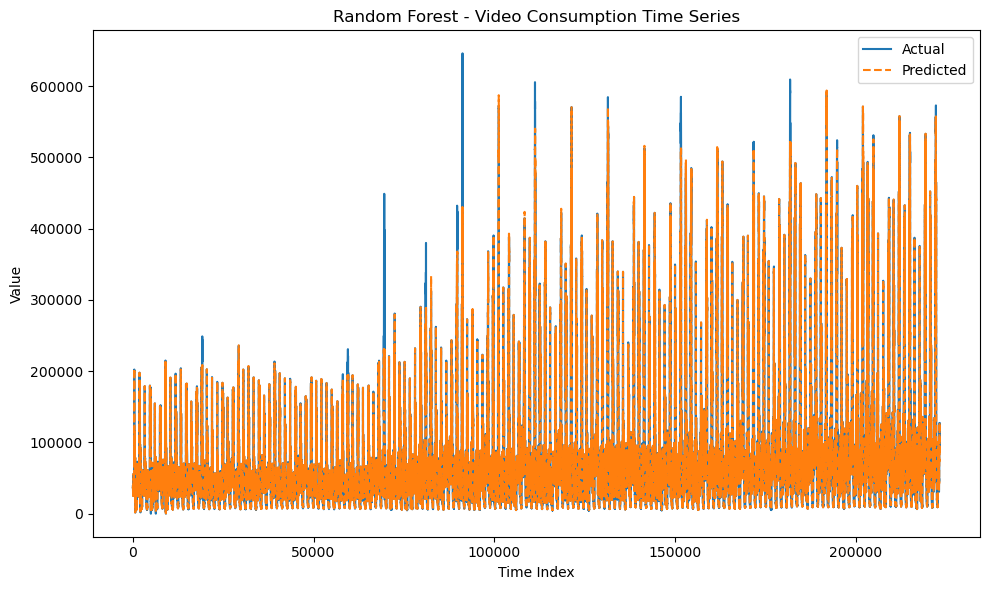

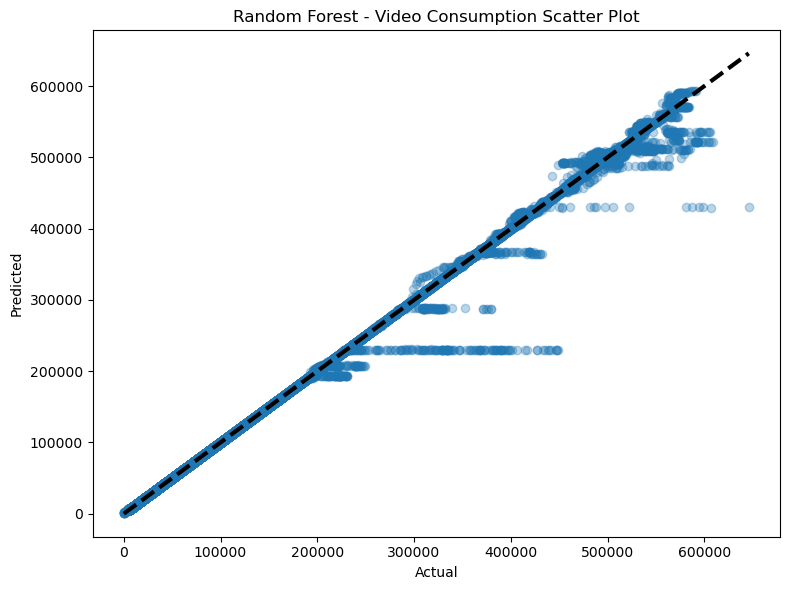

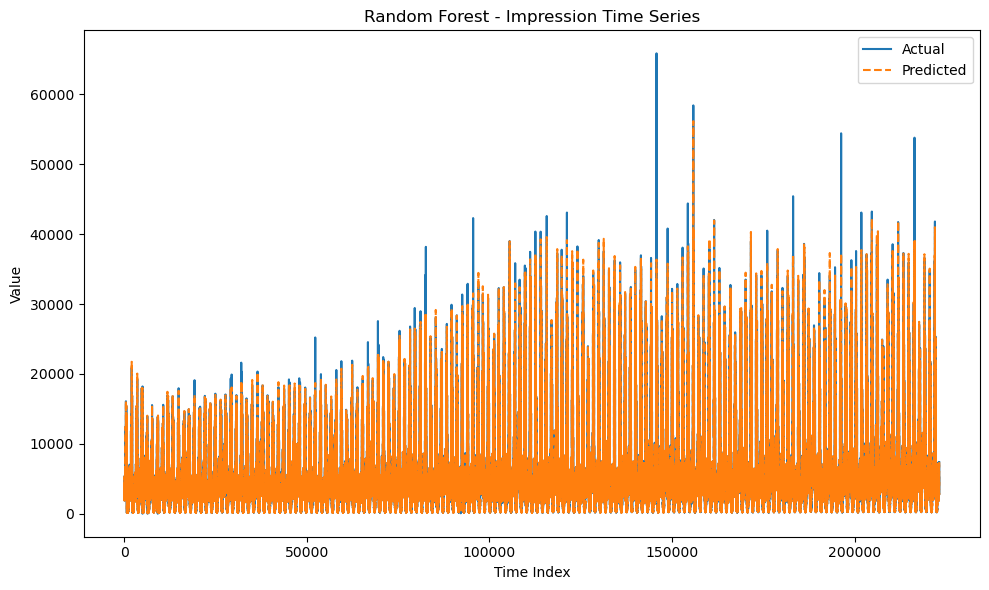

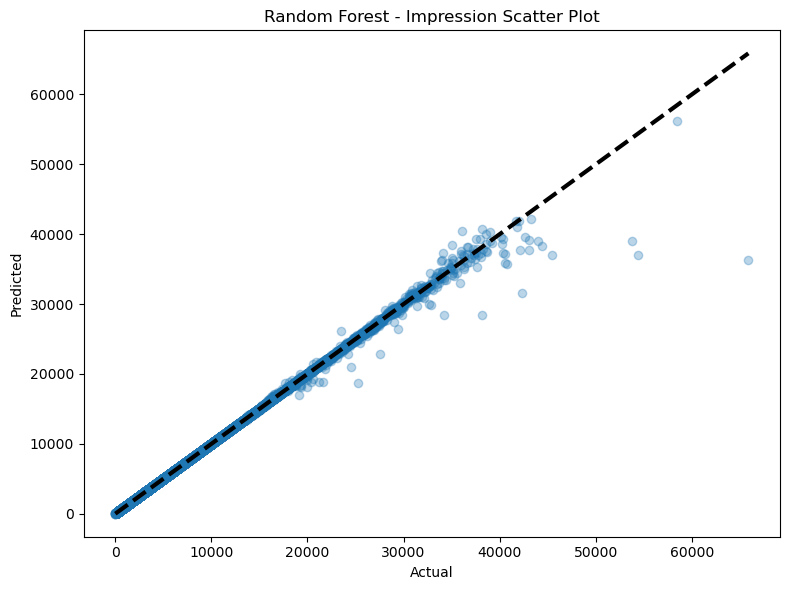

Random Forest - Video Consumption PRMSE: 4.999%
Random Forest - Impression PRMSE: 2.625%


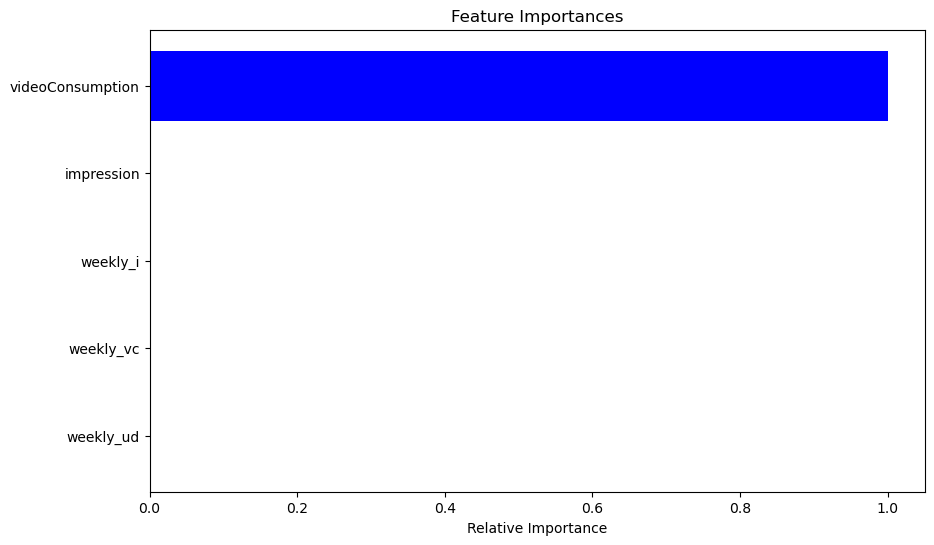

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 10080, number of used features: 5
[LightGBM] [Info] Start training from score 50889.561806
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000648 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 10080, number of used features: 5
[LightGBM] [Info] Start training from score 3154.161806
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000628 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the trai

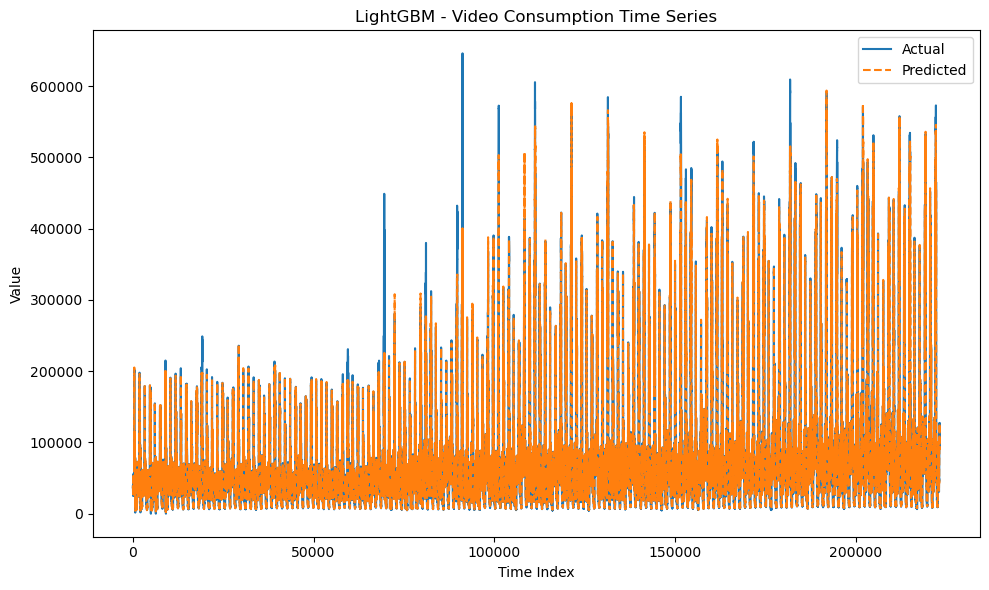

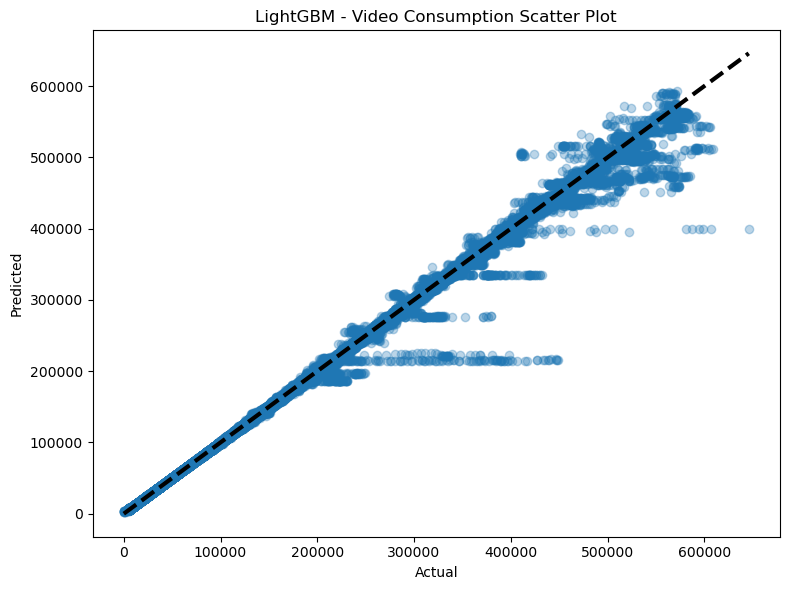

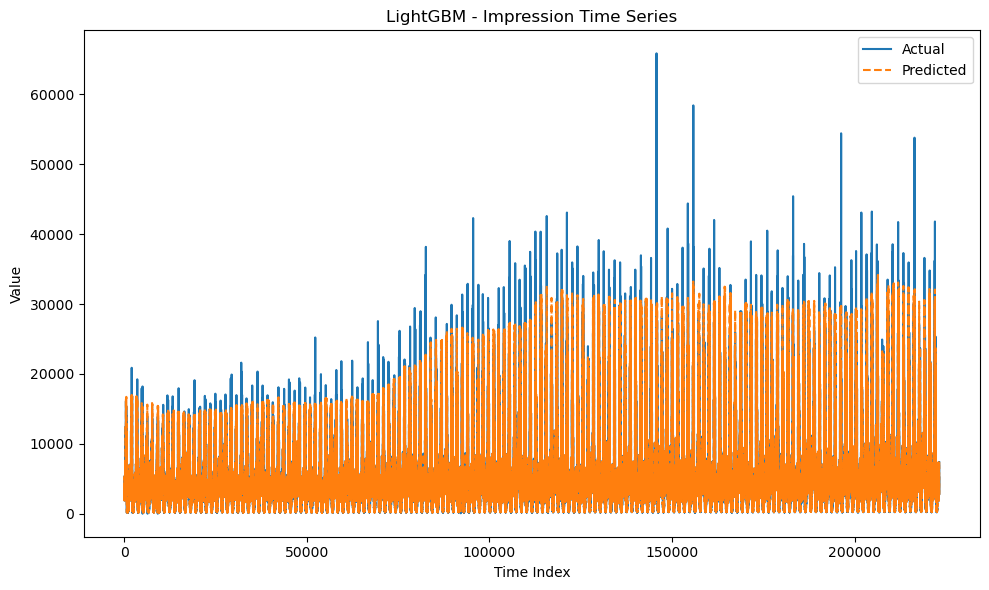

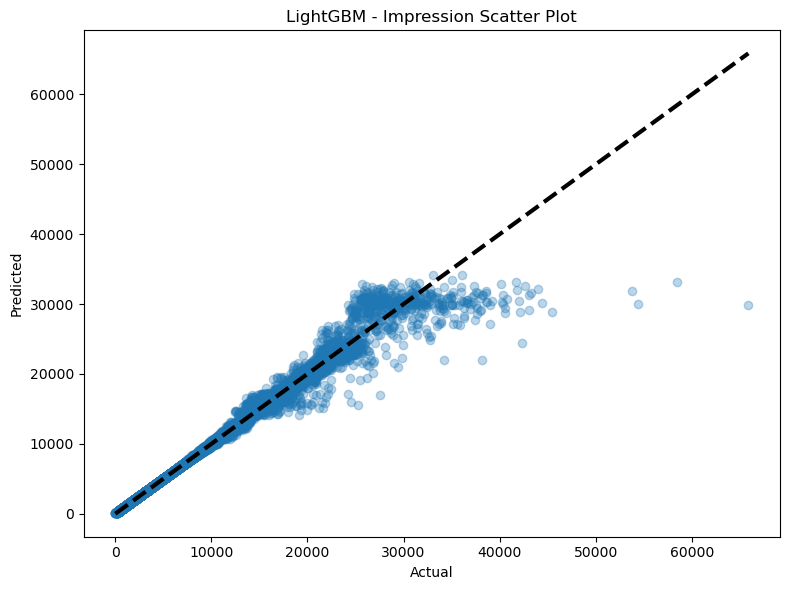

LightGBM - Video Consumption PRMSE: 6.923%
LightGBM - Impression PRMSE: 7.100%


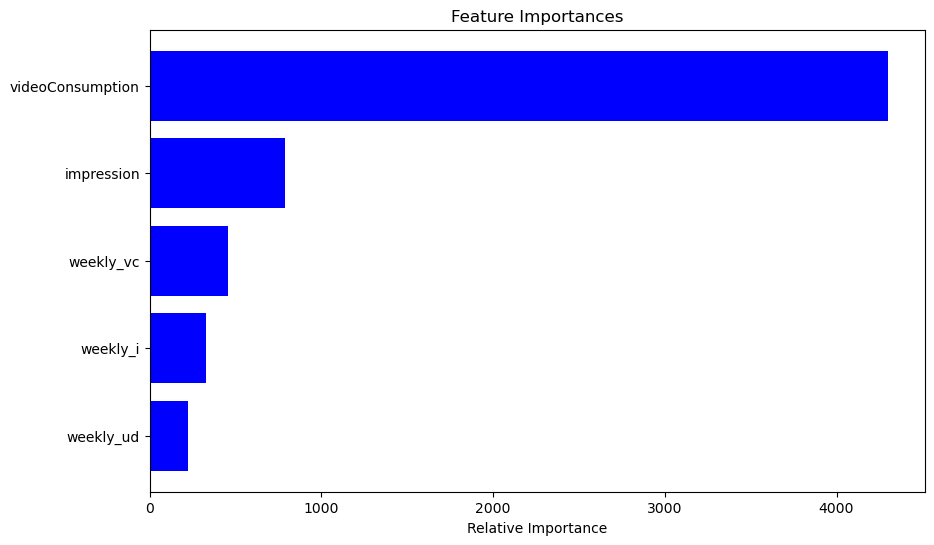

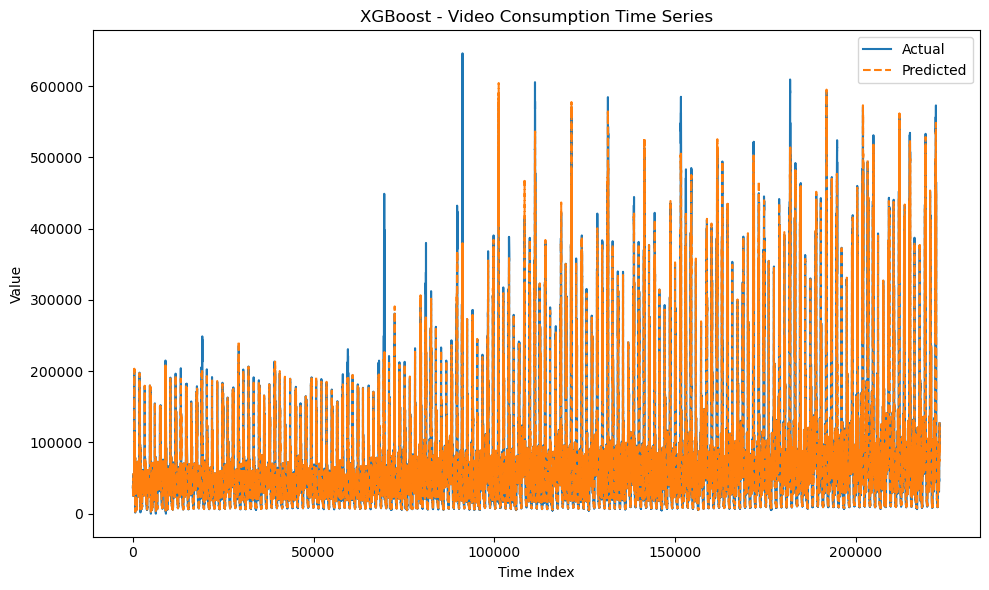

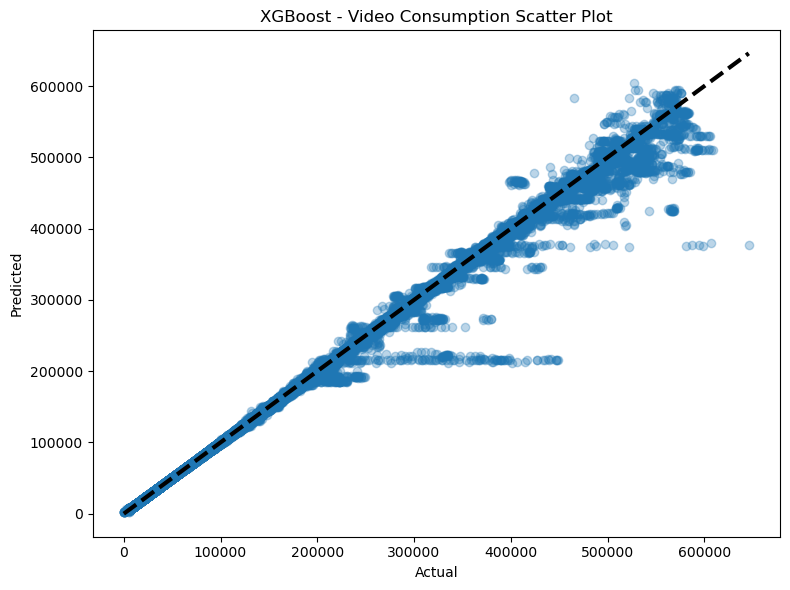

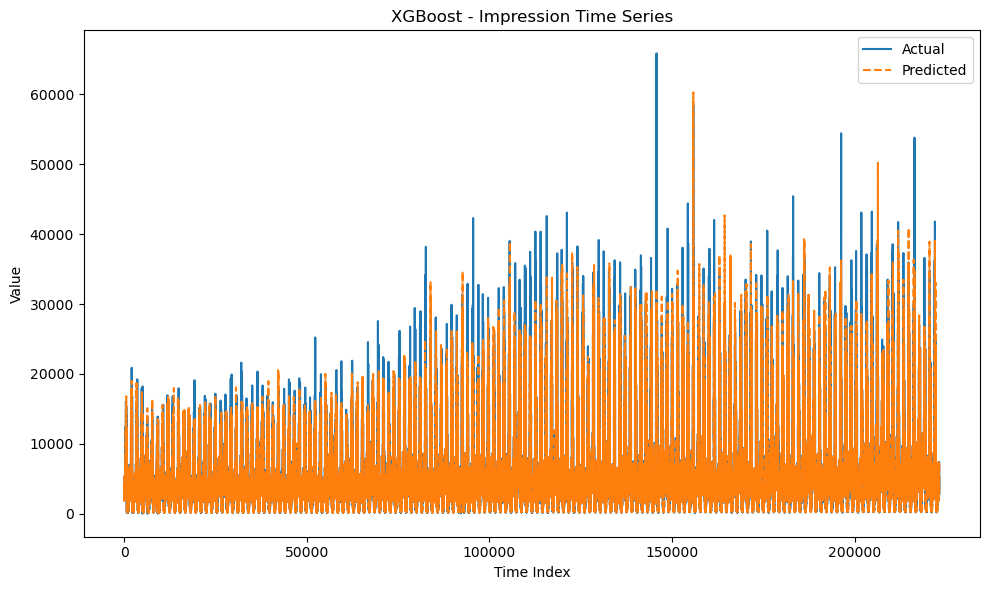

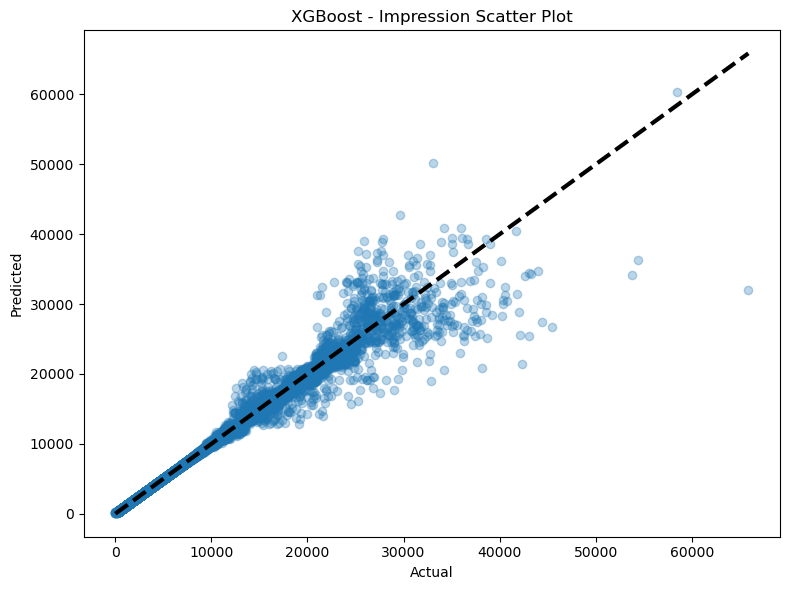

XGBoost - Video Consumption PRMSE: 7.120%
XGBoost - Impression PRMSE: 8.406%


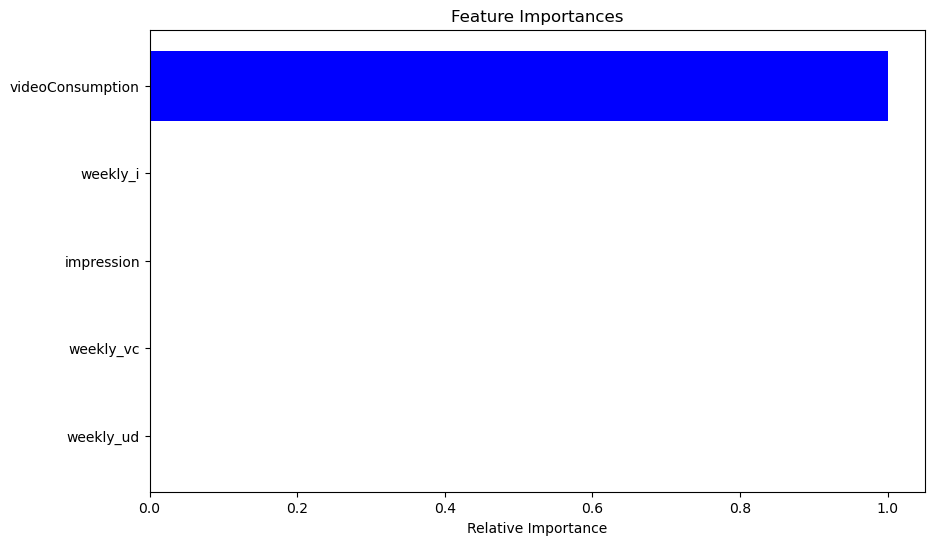

In [ ]:
# Evaluation and Plotting for each model
def process_model(model, test_data, window_size, forecast_horizon, model_name, all_features):
    results = evaluate_model_rolling_window(model, test_data, window_size, forecast_horizon)
    plot_time_series(results["true_values_vc"], results["predictions_vc"], f'{model_name} - Video Consumption Time Series')
    plot_predictions(results["true_values_vc"], results["predictions_vc"], f'{model_name} - Video Consumption Scatter Plot')
    plot_time_series(results["true_values_i"], results["predictions_i"], f'{model_name} - Impression Time Series')
    plot_predictions(results["true_values_i"], results["predictions_i"], f'{model_name} - Impression Scatter Plot')
    print(f"{model_name} - Video Consumption PRMSE: {results['pr_rmse_vc']:.3f}%")
    print(f"{model_name} - Impression PRMSE: {results['pr_rmse_i']:.3f}%")
    if hasattr(model, 'feature_importances_'):
        plot_feature_importance(model, all_features)
    elif hasattr(model.estimators_[0], 'feature_importances_'):  # For MultiOutputRegressor
        plot_feature_importance(model.estimators_[0], all_features)

# Assume models and data are defined correctly
process_model(best_rf_model, test_data, window_size, forecast_horizon, "Random Forest", all_features)
process_model(best_lgbm_model, test_data, window_size, forecast_horizon, "LightGBM", all_features)
process_model(best_xgb_model, test_data, window_size, forecast_horizon, "XGBoost", all_features)

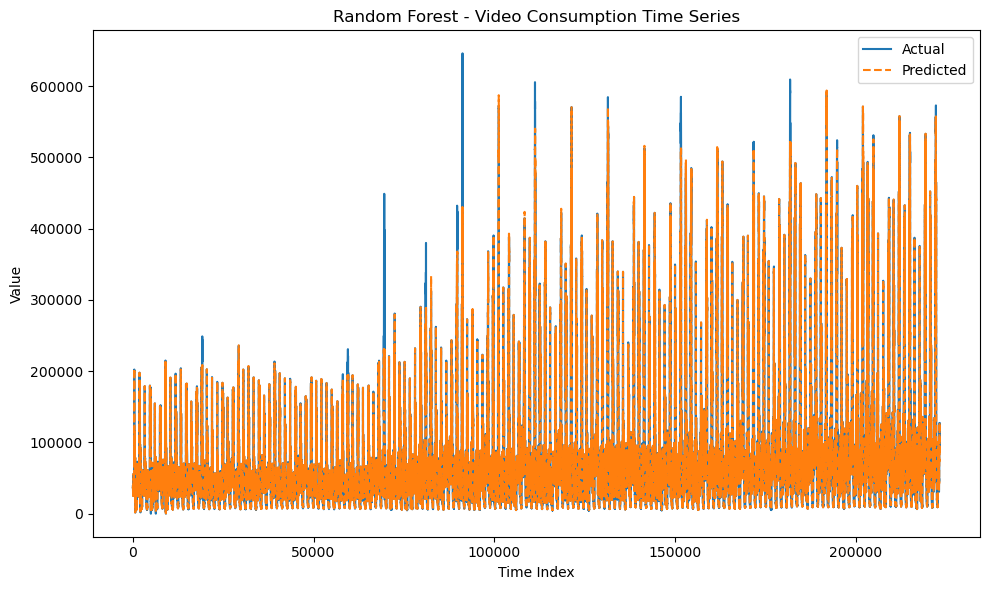

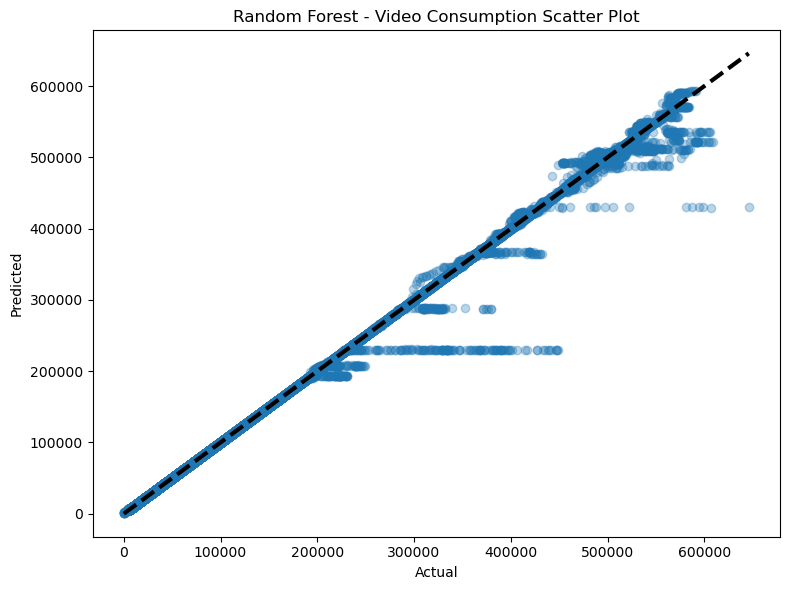

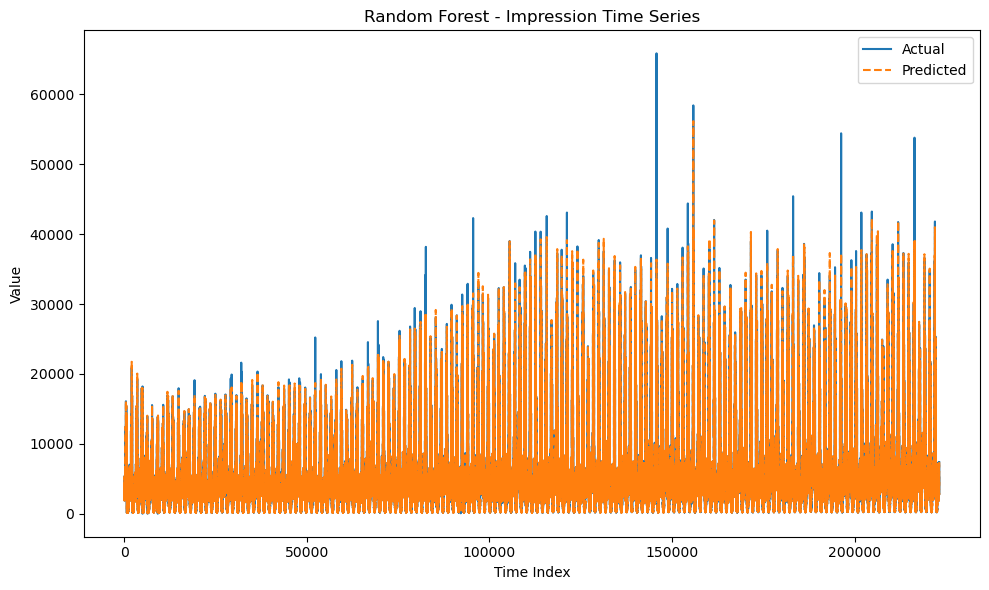

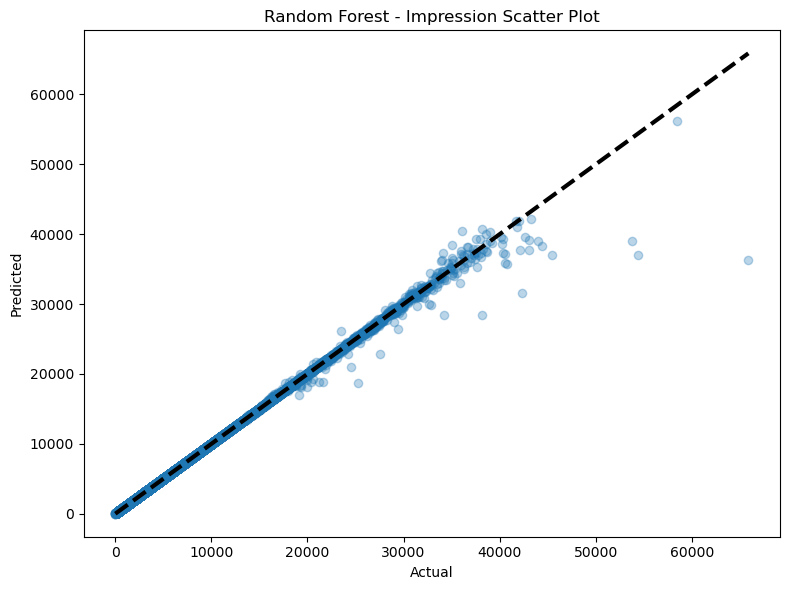

Random Forest - Video Consumption MSE: 13537996.500, RMSE: 3679.402, PRMSE: 4.999%
Random Forest - Impression MSE: 10080.524, RMSE: 100.402, PRMSE: 2.625%


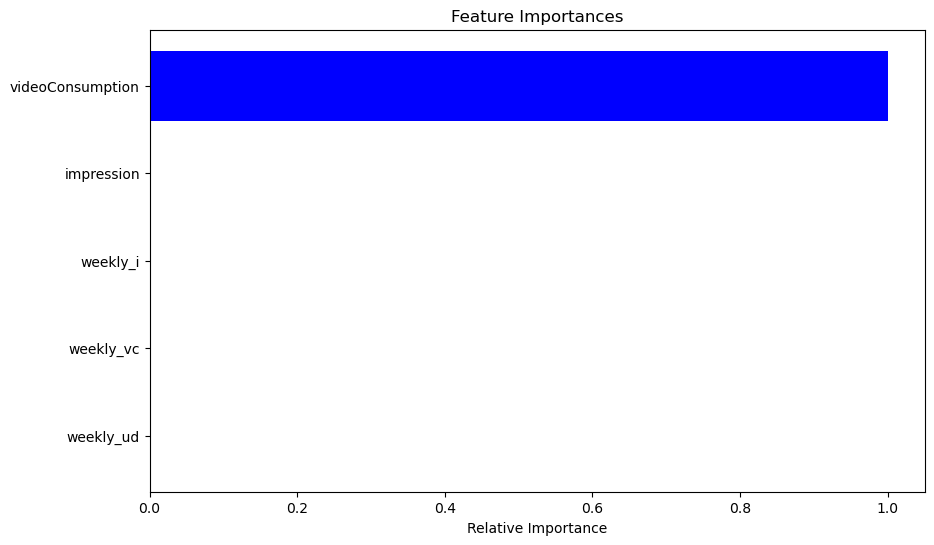

Feature Importances: [('weekly_vc', 3.1667834045857206e-07), ('weekly_i', 3.231107335472192e-07), ('weekly_ud', 3.1297638830290794e-07), ('videoConsumption', 0.9999986802907291), ('impression', 3.669438085877489e-07)]
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 10080, number of used features: 5
[LightGBM] [Info] Start training from score 50889.561806
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 10080, number of used features: 5
[LightGBM] [Info] Start training from score 3154.161806
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.00115

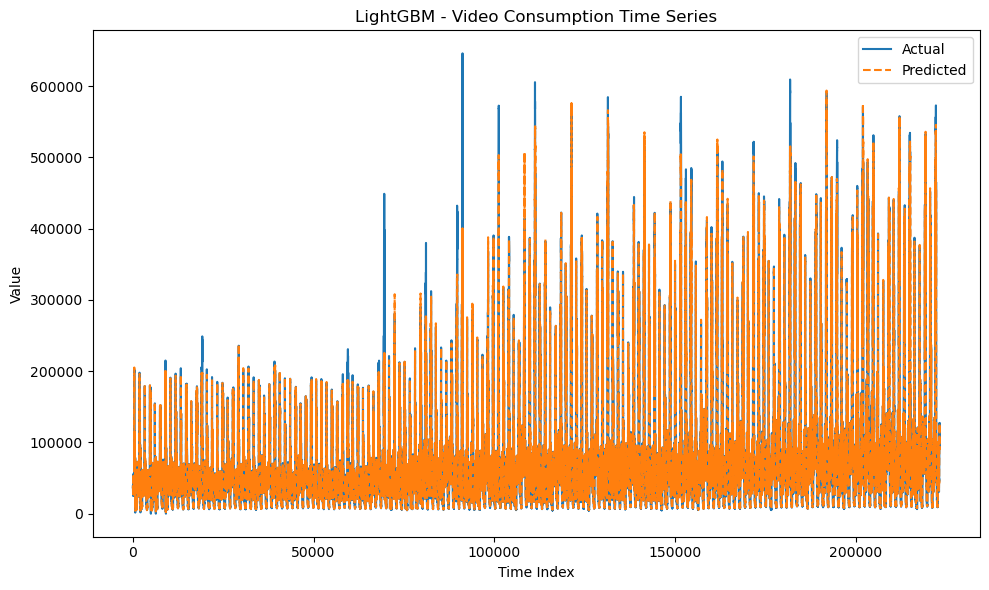

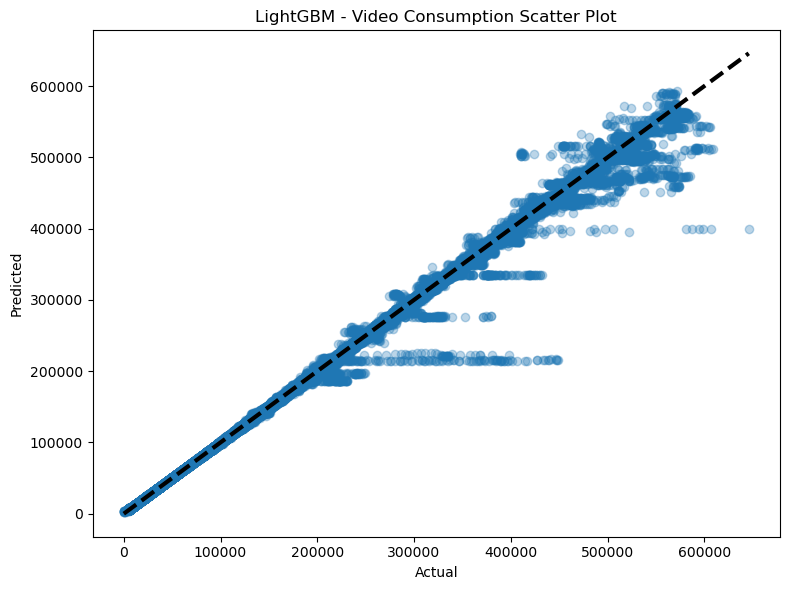

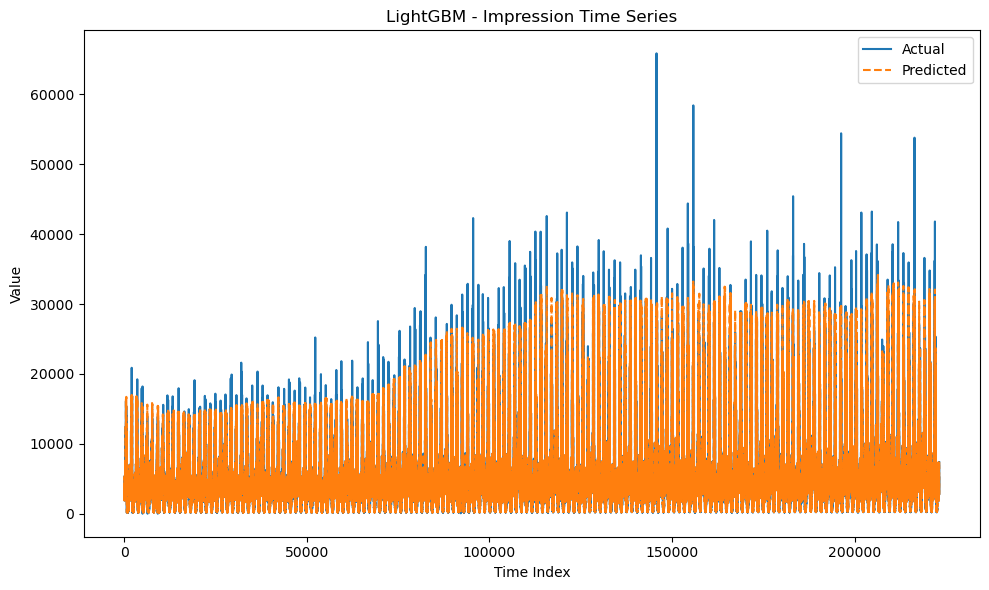

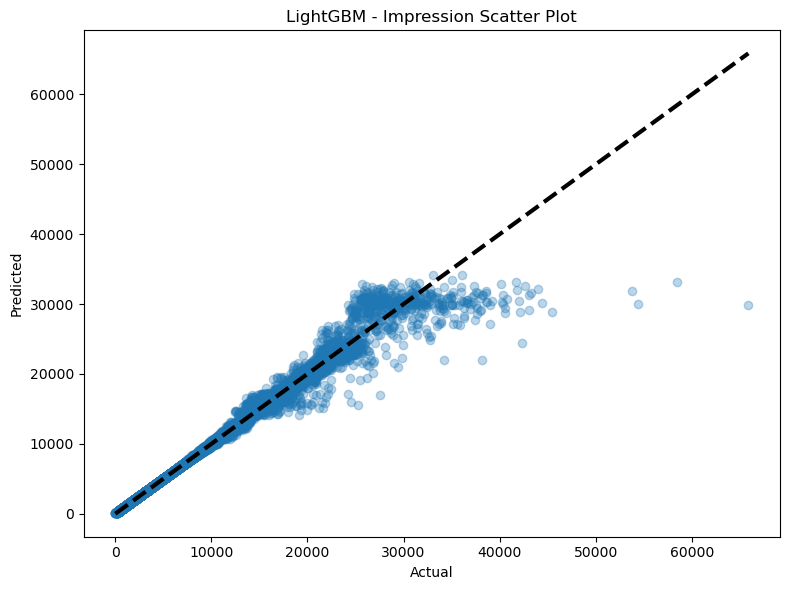

LightGBM - Video Consumption MSE: 25972202.019, RMSE: 5096.293, PRMSE: 6.923%
LightGBM - Impression MSE: 73728.709, RMSE: 271.530, PRMSE: 7.100%


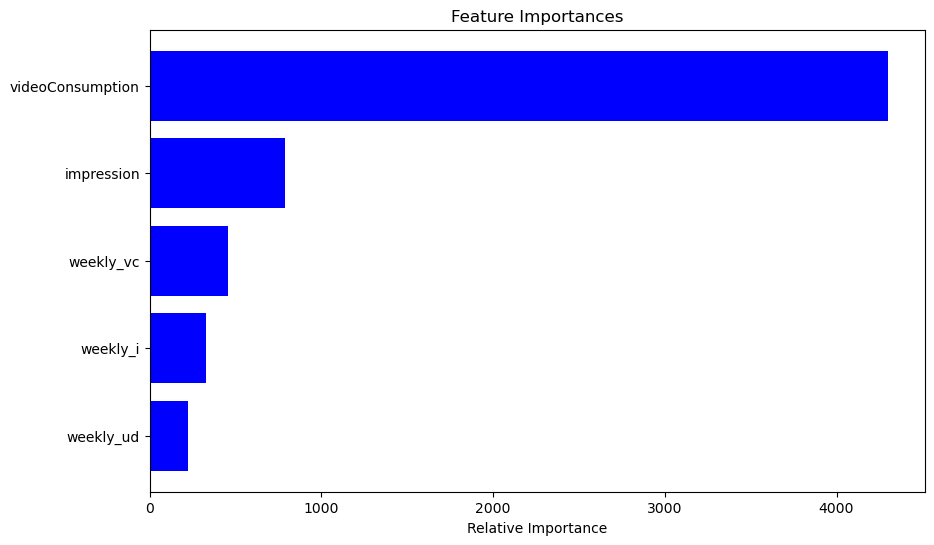

Feature Importances: [('weekly_vc', 459), ('weekly_i', 331), ('weekly_ud', 221), ('videoConsumption', 4298), ('impression', 791)]


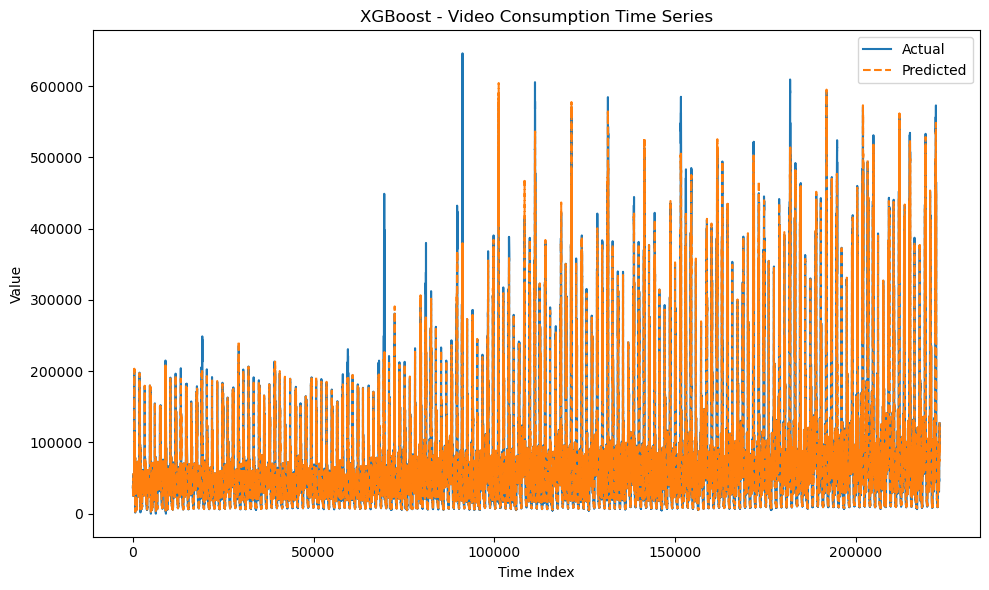

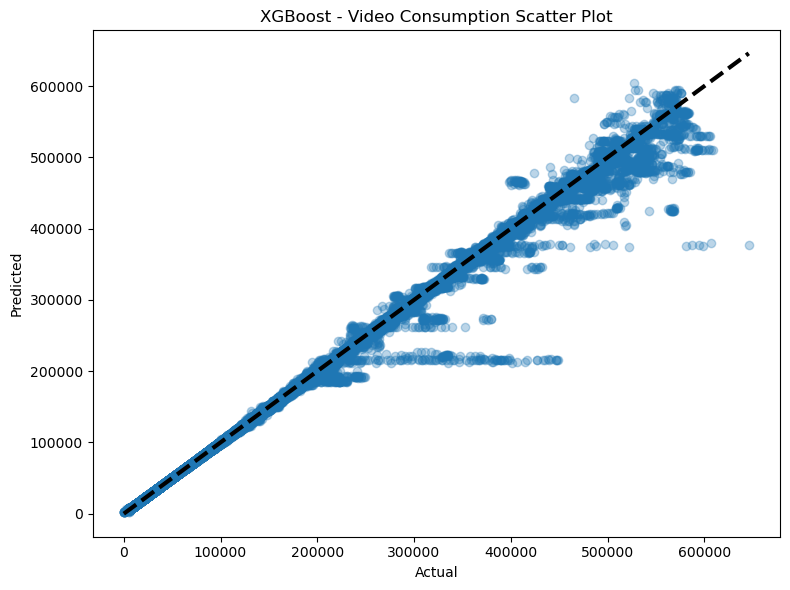

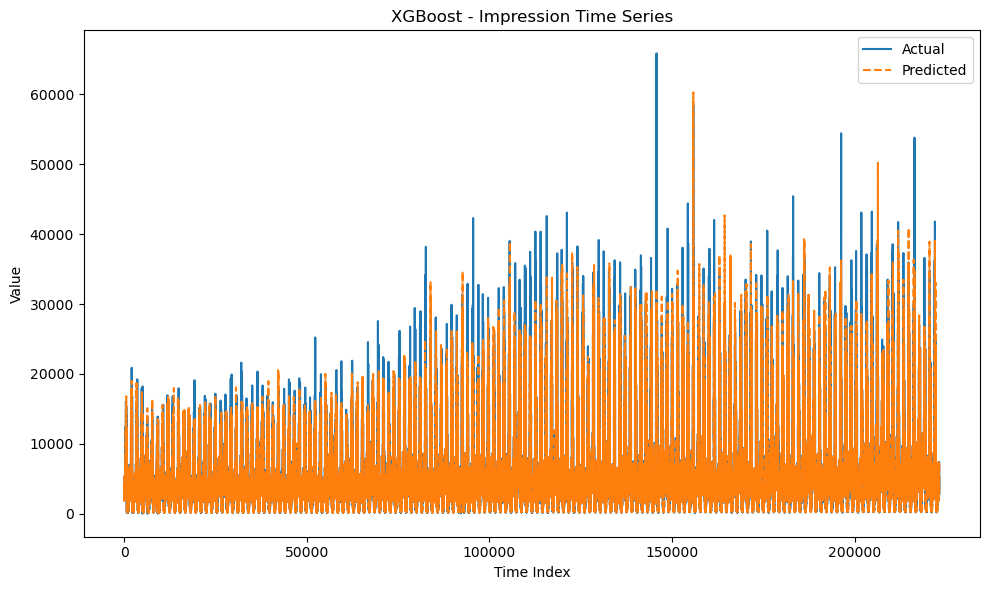

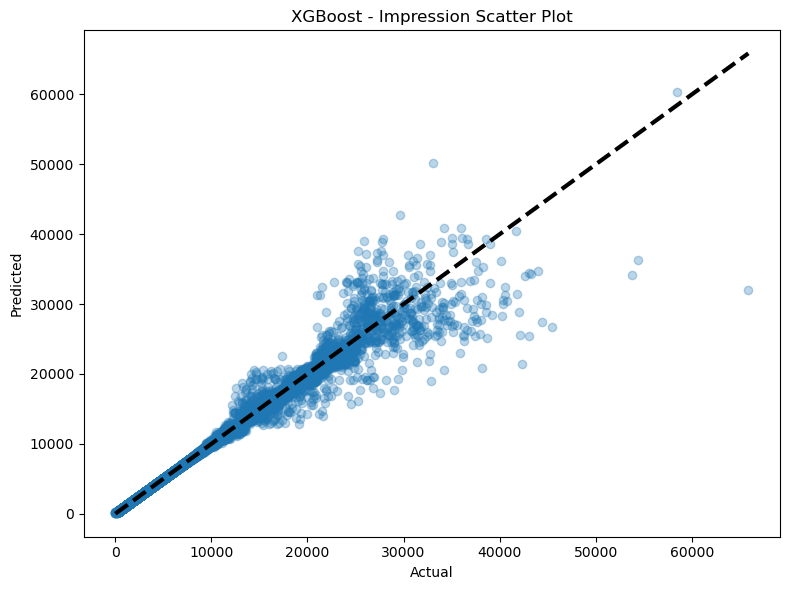

XGBoost - Video Consumption MSE: 27467456.005, RMSE: 5240.940, PRMSE: 7.120%
XGBoost - Impression MSE: 103339.791, RMSE: 321.465, PRMSE: 8.406%


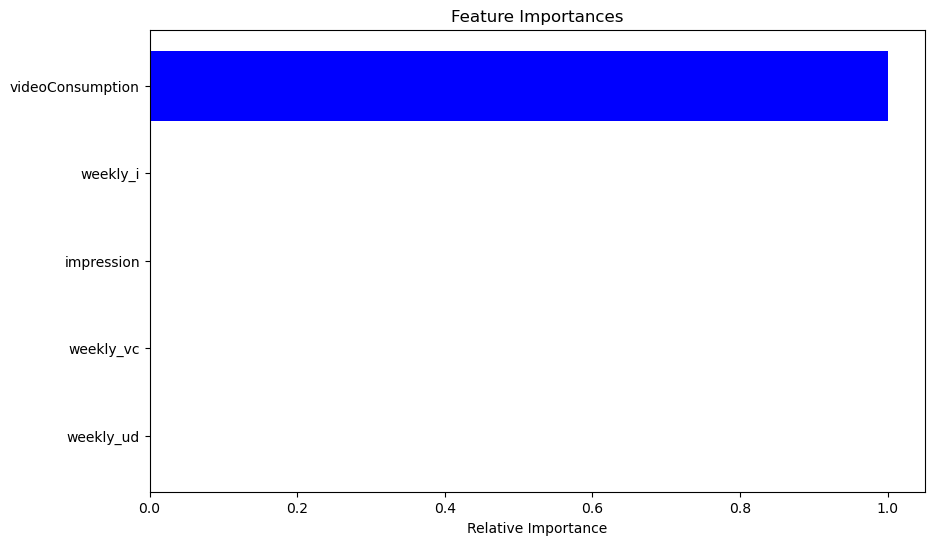

Feature Importances: [('weekly_vc', 1.2982582e-05), ('weekly_i', 1.8385601e-05), ('weekly_ud', 1.1655959e-05), ('videoConsumption', 0.9999435), ('impression', 1.345294e-05)]


In [ ]:
def process_model(model, test_data, window_size, forecast_horizon, model_name, all_features):
    results = evaluate_model_rolling_window(model, test_data, window_size, forecast_horizon)
    plot_time_series(results["true_values_vc"], results["predictions_vc"], f'{model_name} - Video Consumption Time Series')
    plot_predictions(results["true_values_vc"], results["predictions_vc"], f'{model_name} - Video Consumption Scatter Plot')
    plot_time_series(results["true_values_i"], results["predictions_i"], f'{model_name} - Impression Time Series')
    plot_predictions(results["true_values_i"], results["predictions_i"], f'{model_name} - Impression Scatter Plot')

    print(f"{model_name} - Video Consumption MSE: {results['mse_vc']:.3f}, RMSE: {results['rmse_vc']:.3f}, PRMSE: {results['pr_rmse_vc']:.3f}%")
    print(f"{model_name} - Impression MSE: {results['mse_i']:.3f}, RMSE: {results['rmse_i']:.3f}, PRMSE: {results['pr_rmse_i']:.3f}%")

    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        plot_feature_importance(model, all_features)
        print("Feature Importances:", list(zip(all_features, feature_importances)))
    elif hasattr(model.estimators_[0], 'feature_importances_'):  # For MultiOutputRegressor
        feature_importances = model.estimators_[0].feature_importances_
        plot_feature_importance(model.estimators_[0], all_features)
        print("Feature Importances:", list(zip(all_features, feature_importances)))

def plot_feature_importance(model, feature_names):
    plt.figure(figsize=(10, 6))
    importances = model.feature_importances_
    indices = np.argsort(importances)
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

# Assuming best_rf_model, best_lgbm_model, best_xgb_model, test_data, window_size, forecast_horizon, and all_features are defined
process_model(best_rf_model, test_data, window_size, forecast_horizon, "Random Forest", all_features)
process_model(best_lgbm_model, test_data, window_size, forecast_horizon, "LightGBM", all_features)
process_model(best_xgb_model, test_data, window_size, forecast_horizon, "XGBoost", all_features)
